Dieses Notebook behandelt zwei der fundamentalen statistischen Verteilungen: 
- die Normalverteilung (Gaussian) und
- die Gleichverteilung (Uniform)
  
Wir werden diese Verteilungen analysieren und ihre Verhaltensweisen in verschiedenen Kontexten wie Zeitreihen und bivariaten Beziehungen interpretieren.

---
# Anforderung laut Syllabus

Identify fundamental statistical distributions (Gaussian, Uniform) and interpret their trends in various contexts (over time, univariate, bivariate, multivariate).

---
# Die Normalverteilung

- auch Gaußsche Verteilung
- eine der am häufigsten verwendeten Verteilungen in der Statistik
- sie ist eine kontinuierliche Wahrscheinlichkeitsverteilung
- wird durch die Dichtefunktion einer stetigen Zufallsvariablen beschrieben
- kommt in vielen natürlichen Prozessen vor
  - z.B. Verteilung der Körpergröße

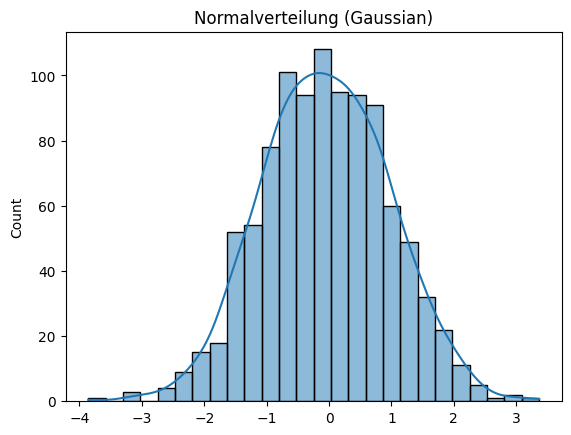

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Simulierte Normalverteilung
normal_data = np.random.normal(loc=0, scale=1, size=1000)

# Darstellung der Normalverteilung
sns.histplot(normal_data, kde=True)
plt.title('Normalverteilung (Gaussian)')
plt.show()

---
## Eigenschaften und Interpretation der Normalverteilung


1. **Form der Kurve ist symmetrisch und glockenförmig**
   - symmetrisch um ihren Mittelwert $\mu $
     - bedeutet: Wahrscheinlichkeit für Werte oberhalb des Mittelwerts = Wahrscheinlichkeit für Werte unterhalb des Mittelwerts
   - konzentriert sich um den Mittelwert $\mu $
     - bedeutet: die meisten Datenpunkte liegen um den Mittelwert
     - mit abnehmender Häufigkeit, je weiter man sich vom Mittelwert entfernt
     - Breite der Glocke wird durch die Standardabweichung $\sigma $ bestimmt
         - je größer $\sigma$, desto breiter und flacher
         - je kleiner $\sigma$, desto schmaler und spitzer

<br>

2. **Mittelwert, Median und Modus sind identisch und liegen bei $\mu $**

<br>

3. **Standardabweichung $\sigma$ gibt an, wie stark die Werte um den Mittelwert streuen**
   - je kleiner $\sigma $, desto steiler und schmaler die Verteilung um den Mittelwert

<br>

4. **Empirische Regel (68-95-99.7-Regel)**
   - ca. **68%** der Werte liegen innerhalb einer Standardabweichung ($ \mu \pm \sigma $).
   - ca. **95%** der Werte liegen innerhalb von zwei Standardabweichungen ($ \mu \pm 2\sigma $).
   - ca. **99.7%** der Werte liegen innerhalb von drei Standardabweichungen ($ \mu \pm 3 \sigma $).

### Beispiel der Normalverteilung: Körpergrößen in einer Population

Die Körpergrößen von Menschen in einer Population (z. B. in einem Land) folgen in der Regel einer Normalverteilung, wobei die meisten Menschen eine durchschnittliche Körpergröße haben und nur wenige extrem groß oder extrem klein sind.


**Annahmen**:

- der **Mittelwert** (Durchschnitt) der Körpergrößen in einer Bevölkerung liegt bei **170 cm**.
- die **Standardabweichung** beträgt **10 cm**, was bedeutet, dass die meisten Menschen sich um diesen Mittelwert herum verteilen.

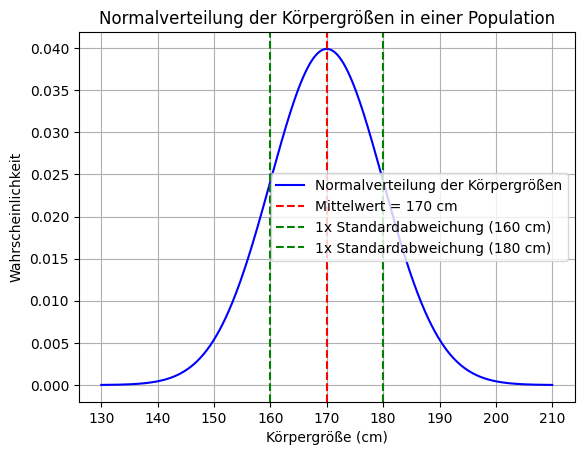

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Parameter der Normalverteilung
mean = 170  # Mittelwert der Körpergröße (in cm)
std_dev = 10  # Standardabweichung (in cm)

# Erstellen von Daten für die Körpergrößen (Normalverteilung)
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)  # Wertebereich für Körpergrößen
y = stats.norm.pdf(x, mean, std_dev)  # Wahrscheinlichkeitsdichtefunktion der Normalverteilung

# Plotten der Normalverteilung
plt.plot(x, y, label='Normalverteilung der Körpergrößen', color='blue')

# Markieren des Mittelwerts und der Standardabweichungen
plt.axvline(mean, color='r', linestyle='--', label='Mittelwert = 170 cm')
plt.axvline(mean - std_dev, color='g', linestyle='--', label='1x Standardabweichung (160 cm)')
plt.axvline(mean + std_dev, color='g', linestyle='--', label='1x Standardabweichung (180 cm)')

# Titel und Beschriftungen
plt.title('Normalverteilung der Körpergrößen in einer Population')
plt.xlabel('Körpergröße (cm)')
plt.ylabel('Wahrscheinlichkeit')
plt.legend()
plt.grid(True)
plt.show()

**Erläuterung**
- Mittelwert (170 cm:
  - die rote gestrichelte Linie zeigt den Mittelwert der Körpergrößen
  - das ist die Körpergröße, die am häufigsten in der Bevölkerung vorkommt
- Standardabweichung (10 cm):
  - die grünen gestrichelten Linien zeigen, dass etwa 68 % der Bevölkerung eine Körpergröße zwischen **160 cm** und **180 cm** haben (eine Standardabweichung vom Mittelwert entfernt)
  - etwa 95 % liegen zwischen 150 cm und 190 cm (zwei Standardabweichungen).
- Glockenkurve:
  - die blaue Kurve zeigt die Verteilung der Körpergrößen
  - sie ist symmetrisch und konzentriert sich um den Mittelwert
  - die Mehrheit der Menschen hat also eine Körpergröße, die nahe am Durchschnitt liegt
  - sehr große oder sehr kleine Menschen kommen seltener vor


### Beispiel der Normalverteilung: Fehler in einem Messsystem

In vielen wissenschaftlichen Experimenten oder industriellen Messprozessen treten zufällige Messfehler auf. Diese Fehler können durch kleine Störungen, Ungenauigkeiten in den Messinstrumenten oder andere unvorhersehbare Faktoren verursacht werden. Typischerweise folgen diese Messfehler einer Normalverteilung.

**Annahmen**:
- Der **Mittelwert** der Fehler ist **0** (keine Abweichung, perfekte Messung).
- Die **Standardabweichung** gibt an, wie stark die Messungen um den Mittelwert (den „wahren“ Wert) streuen. Nehmen wir eine Standardabweichung von **0,5** an.

In einem idealen Messsystem sollten die meisten Messwerte nahe am wahren Wert liegen, aber es gibt immer wieder kleinere zufällige Abweichungen, die sowohl positiv als auch negativ sein können. Extrem große Fehler kommen seltener vor.

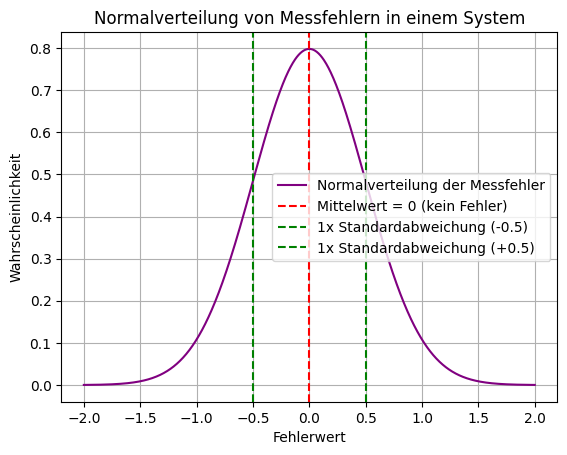

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Parameter der Normalverteilung
mean = 0  # Mittelwert der Messfehler (kein Fehler)
std_dev = 0.5  # Standardabweichung der Messfehler

# Erstellen von Daten für die Fehlerwerte
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)  # Wertebereich für Fehler
y = stats.norm.pdf(x, mean, std_dev)  # Wahrscheinlichkeitsdichtefunktion der Normalverteilung

# Plotten der Normalverteilung
plt.plot(x, y, label='Normalverteilung der Messfehler', color='purple')

# Markieren des Mittelwerts und der Standardabweichungen
plt.axvline(mean, color='r', linestyle='--', label='Mittelwert = 0 (kein Fehler)')
plt.axvline(mean - std_dev, color='g', linestyle='--', label='1x Standardabweichung (-0.5)')
plt.axvline(mean + std_dev, color='g', linestyle='--', label='1x Standardabweichung (+0.5)')

# Titel und Beschriftungen
plt.title('Normalverteilung von Messfehlern in einem System')
plt.xlabel('Fehlerwert')
plt.ylabel('Wahrscheinlichkeit')
plt.legend()
plt.grid(True)
plt.show()

**Erläuterung**
- Mittelwert (0 Fehler):
  - die rote gestrichelte Linie zeigt, dass der Durchschnitt der Messfehler bei **0** liegt
  - das bedeutet, dass keine systematischen Fehler auftreten
- Standardabweichung (0,5):
  - die grünen gestrichelten Linien zeigen, dass 68 % der Fehler zwischen **-0,5** und **+0,5** liegen
  - diese Streuung beschreibt, wie viel Abweichung vom wahren Wert typischerweise zu erwarten ist   
- Glockenkurve:
  - die violette Kurve zeigt, dass kleine Fehler um den Mittelwert herum häufiger auftreten, während große Fehler seltener sind


---
## Univariate Normalverteilung

**Univariat**: eine einzige Variable wird untersucht (z. B. Körpergröße)

Bei der univariaten Normalverteilung sind die Werte symmetrisch um den Mittelwert konzentriert

s. [Beispiel: Körpergrößen in einer Population](#beispiel-der-normalverteilung-koerpergroessen-in-einer-population)

siehe in Datei 'Grundbegriffe'


---
## Bivariate Normalverteilung

**Bivariat**: Beziehung zwischen zwei Variablen
- z. B. Körpergröße und Gewicht
- es wird analysiert, ob und wie stark zwei Variablen miteinander **korrelieren** oder zusammenhängen

In der bivariaten Normalverteilung hängt der Zusammenhang oft mit **Korrelationen** zusammen.

siehe in Datei 'Grundbegriffe'

### Beispiel der bivariaten Normalverteilung: Beziehung von Körpergröße und Gewicht

- in einer Stichprobe werden von 500 Menschen die Körpergröße und das Gewicht gemessen
- die Mittelwerte für Körpergröße und Gewicht werden auf 170 cm und 70 kg gesetzt
- Kovarianzmatrix:
   - steuert die Streuung und Beziehung zwischen den beiden Variablen
   - legt fest, wie Körpergröße und Gewicht korrelieren


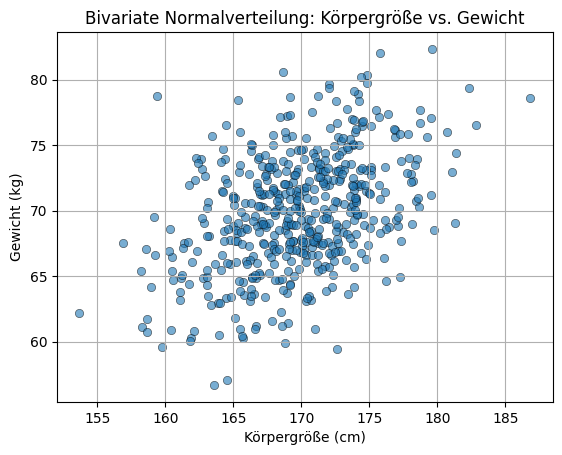

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Parameter für die bivariate Normalverteilung
mean = [170, 70]  # Mittelwerte (Körpergröße in cm, Gewicht in kg)
covariance = [[25, 10], [10, 20]]  # Kovarianzmatrix

# Generierung der Stichprobe
stichprobe = np.random.multivariate_normal(mean, covariance, 500)

# Extrahieren von Körpergröße und Gewicht
koerpergroesse = stichprobe[:, 0]
gewicht = stichprobe[:, 1]

# Erstellen des Scatterplots

sns.scatterplot(x=koerpergroesse, y=gewicht, alpha=0.6, edgecolor='black')
plt.title('Bivariate Normalverteilung: Körpergröße vs. Gewicht')
plt.xlabel('Körpergröße (cm)')
plt.ylabel('Gewicht (kg)')
plt.grid(True)

# Plot anzeigen
plt.show()


---
## Multivariate Normalverteilung

**multivariat**: es werden mehrere Variablen gleichzeitig betrachtet
- z. B. Körpergröße, Gewicht und Alter
- sie beschreibt Daten, die in einem d-dimensionalen Raum verteilt sind
- jede Dimension entspricht einer Variablen
- bedeutet: in einer d-dimensionalen Verteilung gibt es d Variablen
- die Kovarianzmatrix in einer multivariaten Normalverteilung beschreibt die Beziehungen (Korrelationen) zwischen diesen Variablen
- jede dieser Dimensionen ist wichtig, um die Datenstruktur zu verstehen und Hypothesen über die Beziehungen zwischen den Variablen aufzustellen
- wichtige Methoden sind Regression, Hauptkomponentenanalyse (PCA), Clusteranalysen

<br>

- Bei mehrdimensionalen Daten (z. B. 4D oder höher) wird die Visualisierung komplexer
- wir können nicht mehr als drei Dimensionen gleichzeitig darstellen
- in solchen Fällen werden oft Techniken wie Dimensionreduktion (z. B. PCA) verwendet
- damit werden die Daten in eine niedrigere Dimension projiziert und besser visualisiert


### Beispiel der multivariaten Normalverteilung: Beziehung von Körpergröße, Gewicht und Alter

- bei einer Stichprobe von 200 Menschen werden Körpergröße, Gewicht und Alter gemessen bzw. befragt
- es gibt also 3 Variablen und somit 3 Dimensionen:
  - Körpergröße
  - Gewicht
  - Alter

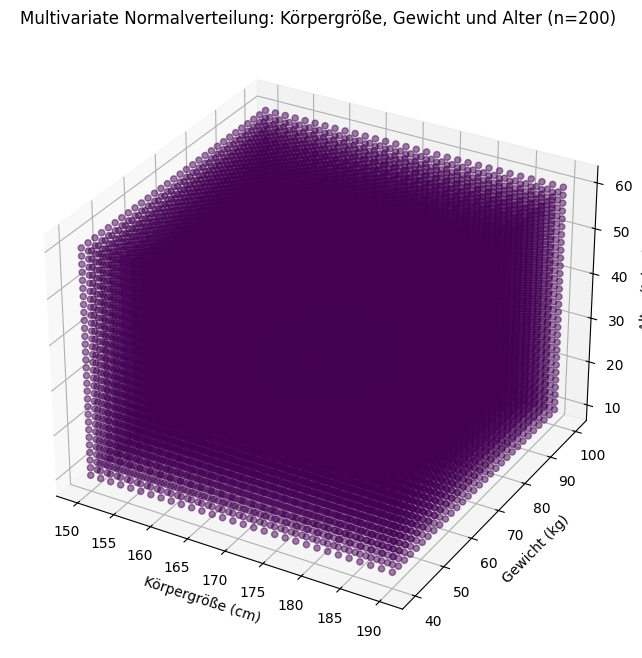

In [14]:
# 3D-Darstellung

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

# Parameter für die multivariate Normalverteilung
mean = [170, 70, 30]  # Mittelwerte (Körpergröße in cm, Gewicht in kg, Alter in Jahren)
covariance = [[25, 10, 5], [10, 20, 10], [5, 10, 15]]  # Kovarianzmatrix

# Erstellen der Gitterpunkte für die Normalverteilung
x = np.linspace(150, 190, 30)  # Körpergröße
y = np.linspace(40, 100, 30)   # Gewicht
z = np.linspace(10, 60, 30)    # Alter
X, Y, Z = np.meshgrid(x, y, z)

# Berechnung der Wahrscheinlichkeitsdichte
pos = np.empty(X.shape + (3,))
pos[:, :, :, 0] = X
pos[:, :, :, 1] = Y
pos[:, :, :, 2] = Z
rv = multivariate_normal(mean, covariance)
density = rv.pdf(pos)

# Erstellen des 3D-Plots
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotten der Dichte
ax.scatter(X.flatten(), Y.flatten(), Z.flatten(), c=density.flatten(), cmap='viridis', alpha=0.5)

# Scatterplot der Stichprobe mit 200 Punkten
stichprobe = np.random.multivariate_normal(mean, covariance, 200)
ax.scatter(stichprobe[:, 0], stichprobe[:, 1], stichprobe[:, 2], color='red', s=20, alpha=0.7)

# Beschriftungen und Titel
ax.set_title('Multivariate Normalverteilung: Körpergröße, Gewicht und Alter (n=200)')
ax.set_xlabel('Körpergröße (cm)')
ax.set_ylabel('Gewicht (kg)')
ax.set_zlabel('Alter (Jahre)')

# Plot anzeigen
plt.show()


 - der 3D-Plot zeigt die Dichte der multivariaten Normalverteilung
 - die roten Punkte stellen die gezogene Stichprobe dar

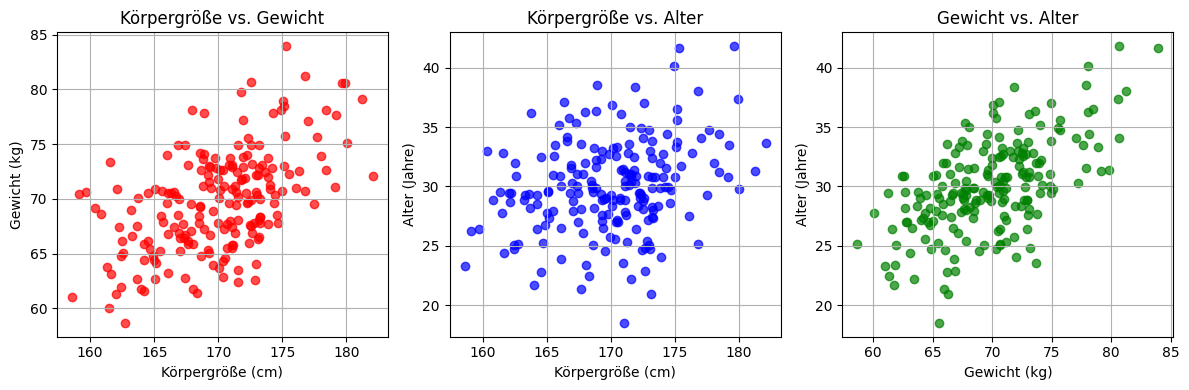

In [15]:
# 2D-Darstellung

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Parameter für die multivariate Normalverteilung
mean = [170, 70, 30]  # Mittelwerte (Körpergröße in cm, Gewicht in kg, Alter in Jahren)
covariance = [[25, 10, 5], [10, 20, 10], [5, 10, 15]]  # Kovarianzmatrix

# Generiere die Stichprobe
stichprobe = np.random.multivariate_normal(mean, covariance, 200)

# Scatterplot Körpergröße vs. Gewicht
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(stichprobe[:, 0], stichprobe[:, 1], color='red', alpha=0.7)
plt.title('Körpergröße vs. Gewicht')
plt.xlabel('Körpergröße (cm)')
plt.ylabel('Gewicht (kg)')
plt.grid(True)

# Scatterplot Körpergröße vs. Alter
plt.subplot(1, 3, 2)
plt.scatter(stichprobe[:, 0], stichprobe[:, 2], color='blue', alpha=0.7)
plt.title('Körpergröße vs. Alter')
plt.xlabel('Körpergröße (cm)')
plt.ylabel('Alter (Jahre)')
plt.grid(True)

# Scatterplot Gewicht vs. Alter
plt.subplot(1, 3, 3)
plt.scatter(stichprobe[:, 1], stichprobe[:, 2], color='green', alpha=0.7)
plt.title('Gewicht vs. Alter')
plt.xlabel('Gewicht (kg)')
plt.ylabel('Alter (Jahre)')
plt.grid(True)

# Layout anpassen und anzeigen
plt.tight_layout()
plt.show()


drei Scatterplots werden in einer Zeile angezeigt, jeweils für die Kombinationen der Variablen:

- Körpergröße vs. Gewicht
- Körpergröße vs. Alter
- Gewicht vs. Alter

---
## Normalverteilung über die Zeit

- in vielen Fällen tendieren aggregierte oder verteilte Daten dazu, sich einer Normalverteilung anzunähern
- vor allem wenn die Daten über längere Zeiträume hinweg betrachtet werden
- geschieht häufig aufgrund des zentralen Grenzwertsatzes
  - der zentrale Grenzwertsatz besagt:
     die Summe (oder der Durchschnitt) einer großen Anzahl unabhängiger Zufallsvariablen, unabhängig von deren ursprünglicher Verteilung, nähert sich einer Normalverteilung an
- Beispiele:
  - Finanzdaten: Bei der Analyse von Renditen von z.B. Aktien kann die Verteilung der Renditen über längere Zeiträume oft als normalverteilte Daten betrachtet werden
  - Wetterdaten: Temperaturen können über Monate oder Jahre aggregiert werden, und ihre Verteilung kann annähernd normal sein
- kann dabei helfen Trends zu identifizieren, Vorhersagen zu treffen und statistische Hypothesentests durchzuführen
- Ausreißer oder Anomalien, die nicht in die Normalverteilung passen, können auf besondere Ereignisse oder Veränderungen im System hinweisen

### Beispiel der Normalverteilung über die Zeit: Tägliche Temperaturen über einen Monat

Annahme: die täglichen Temperaturen in einem bestimmten Monat folgen einem Mittelwert von 20 °C mit einer Standardabweichung von 5 °C

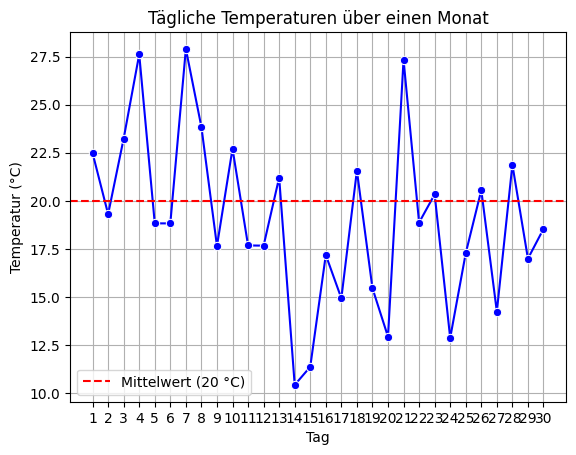

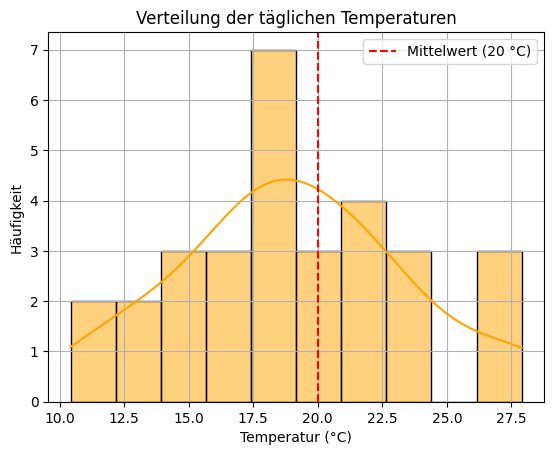

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Parameter für die Normalverteilung
mean_temp = 20  # Mittelwert (in °C)
std_dev_temp = 5  # Standardabweichung (in °C)

# Generiere tägliche Temperaturdaten für einen Monat (30 Tage)
np.random.seed(42)  # Für Reproduzierbarkeit
days = np.arange(1, 31)  # Tage im Monat
daily_temperatures = np.random.normal(mean_temp, std_dev_temp, size=30)

# Erstelle ein DataFrame
temperature_data = pd.DataFrame({'Tag': days, 'Temperatur (°C)': daily_temperatures})

# Plot der täglichen Temperaturen
sns.lineplot(data=temperature_data, x='Tag', y='Temperatur (°C)', marker='o', color='blue')
plt.axhline(y=mean_temp, color='red', linestyle='--', label='Mittelwert (20 °C)')
plt.title('Tägliche Temperaturen über einen Monat')
plt.xlabel('Tag')
plt.ylabel('Temperatur (°C)')
plt.xticks(days)
plt.legend()
plt.grid()
plt.show()

# Histogramm der Temperaturverteilung
sns.histplot(daily_temperatures, bins=10, kde=True, color='orange')
plt.title('Verteilung der täglichen Temperaturen')
plt.xlabel('Temperatur (°C)')
plt.ylabel('Häufigkeit')
plt.axvline(mean_temp, color='red', linestyle='--', label='Mittelwert (20 °C)')
plt.legend()
plt.grid()
plt.show()


- das erste Diagramm zeigt die täglichen Temperaturen über einen Monat
- die rote gestrichelte Linie zeigt den Mittelwert
- veranschaulicht, wie sie um den Mittelwert schwanken
<br>

- das zweite Diagramm stellt die Verteilung der Temperaturen dar
- zeigt, dass sie annähernd einer Normalverteilung folgt

---
<a id="Standardnormalverteilung"></a>

## Spezialfall: Standardnormalverteilung (= Z-Verteilung)

- auch Z-Verteilung
- ist eine Spezialform der Normalverteilung
- Mittelwert $ \mu = 0 $
- Standardabweichung $ \sigma = 1 $ . 

Die Zufallsvariable $ Z $ bei der Standardnormalverteilung nennt man auch "z-Wert" oder "z-Score".

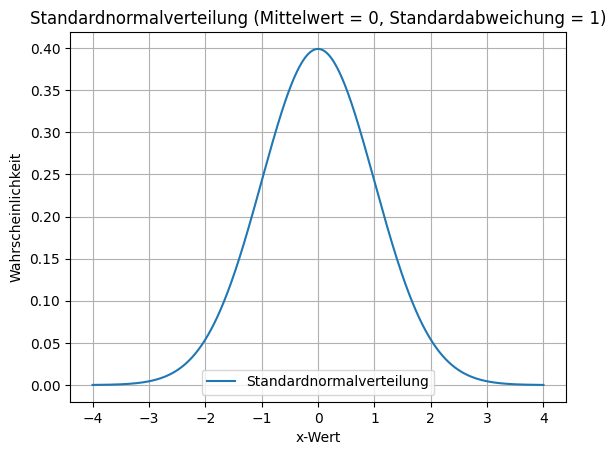

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Erstellen von Daten für die Standardnormalverteilung
x = np.linspace(-4, 4, 1000)  # Wertebereich von -4 bis 4
y = stats.norm.pdf(x, 0, 1)   # Wahrscheinlichkeitsdichtefunktion (PDF) der Standardnormalverteilung

# Plotten der Standardnormalverteilung
plt.plot(x, y, label='Standardnormalverteilung')
plt.title('Standardnormalverteilung (Mittelwert = 0, Standardabweichung = 1)')
plt.xlabel('x-Wert')
plt.ylabel('Wahrscheinlichkeit')
plt.grid(True)
plt.legend()
plt.show()


---
# Die Gleichverteilung

- Uniform Distribution
- eine der einfachsten statistischen Verteilungen
- beschreibt eine Situation, in der alle möglichen Ergebnisse **gleich wahrscheinlich** sind
- bedeutet: jedes mögliche Ereignis oder jeder mögliche Wert in einem bestimmten Bereich hat die gleiche Wahrscheinlichkeit aufzutreten


Beispiele:
- Würfeln (1,...,6)
- Lotteriespiel/Münzwurf usw.
- Pseudozufallsvariablen
- zufälliges Ziehen einer Karte aus gut gemischtem Kartendeck
- zufälliges Platzieren eines Puntkes auf einem linearen Intervall


Die Gleichverteilung stellt also eine ideale Verteilung dar, wenn keine Präferenz oder Verzerrung zugunsten eines bestimmten Ergebnisses besteht. Alle Ergebnisse sind gleich wahrscheinlich.

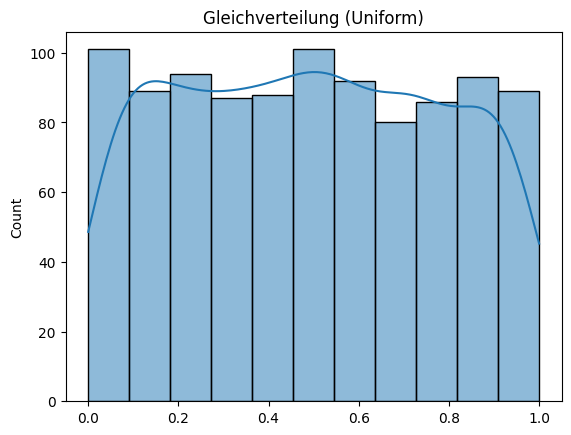

In [5]:
# Simulierte Gleichverteilung
uniform_data = np.random.uniform(low=0, high=1, size=1000)

# Darstellung der Gleichverteilung
sns.histplot(uniform_data, kde=True)
plt.title('Gleichverteilung (Uniform)')
plt.show()

## Eigenschaften und Interpretation der Gleichverteilung

1. **alle Werte im Bereich haben die gleiche Wahrscheinlichkeit**
  
2. **daher ist die Form der Kurve rechteckig**

3. **Endlicher Bereich**
    - die Verteilung ist auf einen festen Bereich begrenzt
    - beispielsweise von einem Minimum bis zu einem Maximum
      

  
4. **zwei Haupttypen der Gleichverteilung**
   - Diskrete Gleichverteilung

   - Stetige Gleichverteilung

---
## Diskrete Gleichverteilung

- die möglichen Ergebnisse sind abzählbar
- jedes dieser Ergebnisse hat die gleiche Wahrscheinlichkeit

### Beispiel: Würfeln
- jede Zahl von 1 bis 6 hat die gleiche Wahrscheinlichkeit, geworfen zu werden
- die Wahrscheinlichkeit für jede Zahl ist $1/6$

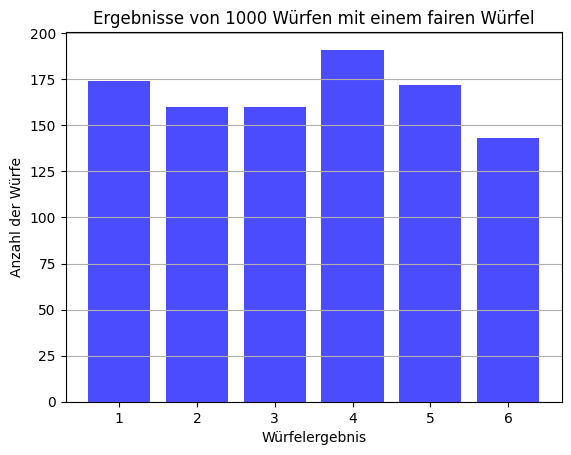

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Anzahl der Würfe
n_wuerfe = 1000

# Simulieren der Würfelwürfe (Zahlen von 1 bis 6)
wuerfe = np.random.choice(np.arange(1, 7), size=n_wuerfe)

# Zählen der Ergebnisse
werte, counts = np.unique(wuerfe, return_counts=True)

# Plotten der Ergebnisse
plt.bar(werte, counts, color='blue', alpha=0.7)

# Beschriftungen und Titel
plt.title('Ergebnisse von 1000 Würfen mit einem fairen Würfel')
plt.xlabel('Würfelergebnis')
plt.ylabel('Anzahl der Würfe')
plt.grid(axis='y')
plt.xticks(werte)  # Anzeige der Ergebnisse auf der x-Achse

# Plot anzeigen
plt.show()



- der Plot zeigt die Verteilung der Ergebnisse von 1000 Würfen mit einem Würfel
- die Balken stellen die Anzahl der Würfe für jedes Ergebnis (1 bis 6) dar
- die Balken sollten in der Nähe von 166 bis 167 für jedes Ergebnis liegen, da die Wahrscheinlichkeit für jedes Ergebnis gleich ist
- dies ist typisch für eine diskrete Gleichverteilung

### Beispiel: Münzwurf

- bei einem fairen Münzwurf gibt es nur zwei mögliche Ergebnisse: Kopf (H) oder Zahl (Z)
- das sind diskrete Werte, was typisch für eine diskrete Zufallsvariable ist
- gleiche Wahrscheinlichkeit, dass sie auf Kopf oder Zahl landet
- die Wahrscheinlichkeitsverteilung kann als diskrete Verteilung dargestellt werden, da es nur zwei mögliche Ergebnisse gibt und diese mit ihren jeweiligen Wahrscheinlichkeiten aufgelistet werden können

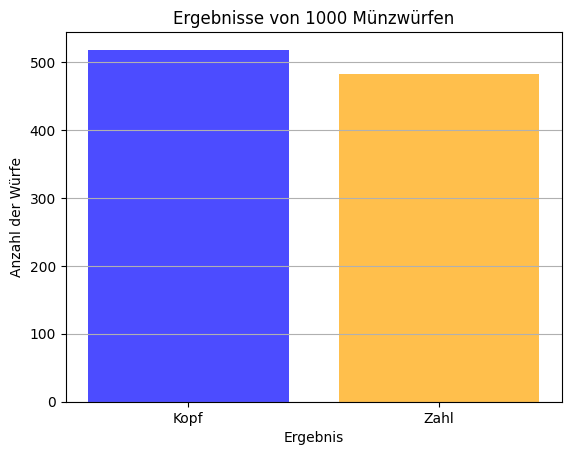

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Anzahl der Münzwürfe
n_wuerfe = 1000

# Simulieren der Münzwürfe (0 = Kopf, 1 = Zahl)
wuerfe = np.random.choice(['Kopf', 'Zahl'], size=n_wuerfe)

# Zählen der Ergebnisse
werte, counts = np.unique(wuerfe, return_counts=True)

# Plotten der Ergebnisse
plt.bar(werte, counts, color=['blue', 'orange'], alpha=0.7)

# Beschriftungen und Titel
plt.title('Ergebnisse von 1000 Münzwürfen')
plt.xlabel('Ergebnis')
plt.ylabel('Anzahl der Würfe')
plt.grid(axis='y')
plt.xticks(werte)  # Anzeige der Ergebnisse auf der x-Achse

# Plot anzeigen
plt.show()


- der Plot zeigt die Verteilung der Ergebnisse von 1000 Münzwürfen
- die Balken stellen dabei die Anzahl der Ergebnisse für Kopf und Zahl dar
- sie liegen für beide Ergebnisse in der Nähe von 500
- veranschaulicht die gleiche Wahrscheinlichkeit für jedes Ergebnis

---
## Stetige Gleichverteilung

- auch kontinuierliche Gleichverteilung
- die Wahrscheinlichkeit ist über einen kontinuierlichen Bereich (definiertes Intervall) gleichmäßig verteilt

    [stetige Gleichverteilung bei Wikipedia](https://de.wikipedia.org/wiki/Stetige_Gleichverteilung)


### Beispiel: zufällige Wahl einer Zahl zwischen 0 und 1
- jeder Wert in diesem Bereich hat die gleiche Wahrscheinlichkeit
- die Wahrscheinlichkeit, dass die Zahl in einem bestimmten Teilbereich liegt, ist proportional zur Länge dieses Bereichs
- bedeutet: die Wahrscheinlichkeit, dass ein Wert in einem bestimmten Intervall innerhalb von \([a, b]\) liegt, ist gleichmäßig verteilt

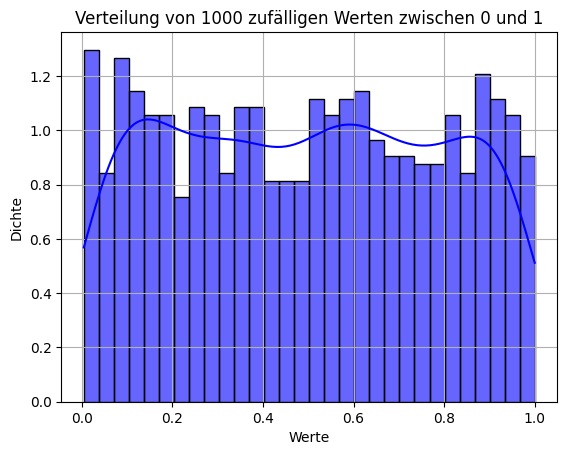

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Anzahl der zufälligen Werte
n_werte = 1000

# Generieren zufälliger Werte zwischen 0 und 1
werte = np.random.uniform(0, 1, n_werte)

# Erstellen des Histogramms der zufälligen Werte
sns.histplot(werte, bins=30, kde=True, stat="density", color='blue', alpha=0.6)

# Beschriftungen und Titel
plt.title('Verteilung von 1000 zufälligen Werten zwischen 0 und 1')
plt.xlabel('Werte')
plt.ylabel('Dichte')
plt.grid(True)

# Plot anzeigen
plt.show()



- das Histogramm zeigt die Verteilung der 1000 zufälligen Werte zwischen 0 und 1
- die Kurve verläuft annährend rechteckig, was die Wahrscheinlichkeitsdichte im Bereich von 0 bis 1 darstellt
- jede Zahl zwischen 0 und 1 hat die gleiche Wahrscheinlichkeitsdichte
- das ist typisch für eine stetige Gleichverteilung



---
## Univariate Gleichverteilung

**Univariat**: eine einzige Variable wird untersucht (z. B. Würfeln (1 bis 6))

bei der univariaten Gleichverteilung ist jede Ausprägung gleich wahrscheinlich

s. 'Beispiel Würfeln'

siehe in Datei 'Grundbegriffe'

---
## Bivariate Gleichverteilung

**Bivariat**: Beziehung zwischen zwei Variablen
- z.B. das Werfen von zwei Würfeln
  - jede mögliche Kombination (von 1-1 bis 6-6) hat die selbe Wahrscheinlichkeit
- es wird analysiert, ob und wie stark zwei Variablen miteinander **korrelieren** oder zusammenhängen

in der bivariaten Gleichverteilung ist jede Kombination von Werten gleich wahrscheinlich und oft existiert keine Korrelation

siehe in Datei 'Grundbegriffe'

### Beispiel der bivariaten Gleichverteilung: Wurf von zwei Würfeln

 - zwei Würfel werden jeweils 500 mal geworfen
 - jede mögliche Kombination (von 1-1 bis 6-6) hat die gleiche Wahrscheinlichkeit

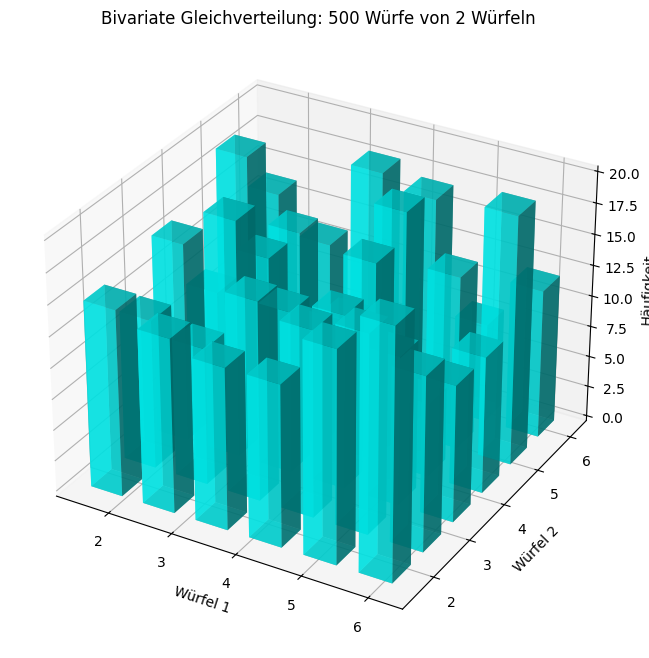

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Anzahl der Würfe
n_wuerfe = 500

# Simulation der Würfelergebnisse (2 Würfel)
würfel_1 = np.random.randint(1, 7, n_wuerfe)  # Ergebnisse des ersten Würfels
würfel_2 = np.random.randint(1, 7, n_wuerfe)  # Ergebnisse des zweiten Würfels

# Erstellen des 3D-Plots
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Zähle die Häufigkeit der Ergebnisse
hist, xedges, yedges = np.histogram2d(würfel_1, würfel_2, bins=(6, 6), range=[[1, 6], [1, 6]])

# Berechne die X- und Y-Koordinaten für die Balken
xpos, ypos = np.meshgrid(xedges[:-1] + 0.5, yedges[:-1] + 0.5, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0  # Startz-Position für die Balken

# Die Höhe der Balken entspricht der Häufigkeit
dx = dy = 0.5  # Breite der Balken
dz = hist.ravel()

# Erstelle die Balken
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average', color='cyan', alpha=0.7)

# Beschriftungen und Titel
ax.set_title('Bivariate Gleichverteilung: 500 Würfe von 2 Würfeln')
ax.set_xlabel('Würfel 1')
ax.set_ylabel('Würfel 2')
ax.set_zlabel('Häufigkeit')

# Plot anzeigen
plt.show()

- der Plot zeigt die bivariate Gleichverteilung der Ergebnisse von 500 Würfen mit zwei Würfeln
- jeder Balken im Diagramm stellt die Häufigkeit einer bestimmten Kombination der Würfelergebnisse dar
- in einer perfekten Gleichverteilung sollten alle Kombinationen ähnlich häufig auftreten
- dies wird durch die Balkenhöhen veranschaulicht
- die Form des Plots ist annährend würfelförmig

## Multivariate Gleichverteilung

- beschreibt eine Wahrscheinlichkeitsverteilung, bei der alle möglichen Ergebnisse innerhalb eines definierten Hyperwürfels oder Hyperquaders gleich wahrscheinlich sind
- in höheren Dimensionen kann dies als ein Volumen beschrieben werden, in dem jeder Punkt die gleiche Wahrscheinlichkeit hat
- z. B. das Werfen von drei oder mehr Würfeln

### Beispiel der multivariaten Gleichverteilung: Wurf von drei Würfeln

- drei Würfel werden jeweils 200 mal geworfen
  - jede mögliche Kombination (von 1-1-1 bis 6-6-6) hat die gleiche Wahrscheinlichkeit

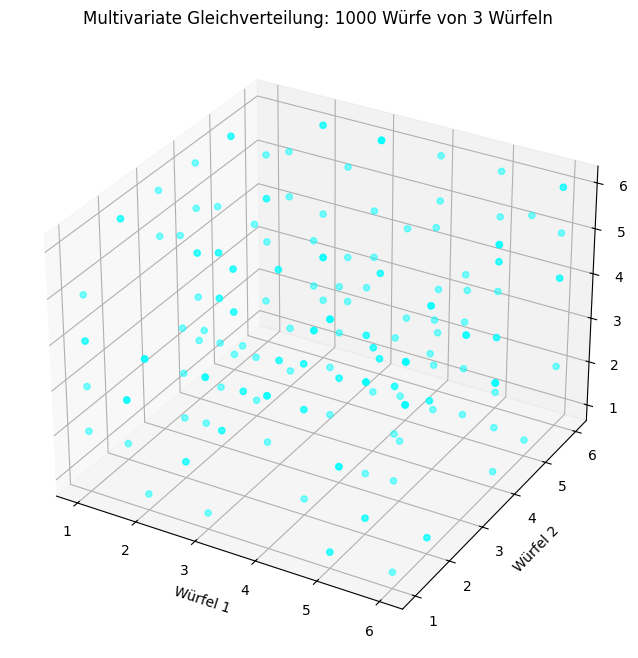

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Anzahl der Würfe
n_wuerfe = 200

# Simulation der Würfelergebnisse (3 Würfel)
würfel_1 = np.random.randint(1, 7, n_wuerfe)  # Ergebnisse des ersten Würfels
würfel_2 = np.random.randint(1, 7, n_wuerfe)  # Ergebnisse des zweiten Würfels
würfel_3 = np.random.randint(1, 7, n_wuerfe)  # Ergebnisse des dritten Würfels

# Erstellen des 3D-Plots
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatterplot der Würfelergebnisse
ax.scatter(würfel_1, würfel_2, würfel_3, color='cyan', alpha=0.5)

# Beschriftungen und Titel
ax.set_title('Multivariate Gleichverteilung: 1000 Würfe von 3 Würfeln')
ax.set_xlabel('Würfel 1')
ax.set_ylabel('Würfel 2')
ax.set_zlabel('Würfel 3')

# Plot anzeigen
plt.show()


- der 3D-Plot zeigt die Verteilung der Ergebnisse von 200 Würfen mit drei Würfeln
- jeder Punkt repräsentiert ein Ergebnis
- alle Kombinationen von Würfelergebnissen sind gleich wahrscheinlich

## Gleichverteilung über die Zeit

- jeder Zeitpunkt oder jeder Zeitraum hat die gleiche Wahrscheinlichkeit hat, dass ein Ereignis eintritt oder eine Beobachtung gemacht wird
- alle möglichen Werte oder Zeitintervalle haben dieselbe Wahrscheinlichkeit, gewählt zu werden

### Beispiel der Gleichverteilung über die Zeit: Kunden im Verlauf eines Tages

- wie beobachten die Anzahl der Kunden, die im Verlauf eines Tages (über 10 Stunden) ein Geschäft betreten
- wir wählen zufällige Zeitpunkte aus, um stündlich eine Stichprobe zu nehmen
- eine gleichverteilte Zeitstichprobe würde bedeuten, dass die Wahrscheinlichkeit, dass ein Kunde zu jedem Zeitpunkt eintritt, über den gesamten Zeitraum gleich bleibt

<br>

- wir generieren zufällige Zeitpunkte über einen 10-Stunden-Zeitraum,
- diese sind gleichverteilt
- wir plotten diese zufälligen Zeitpunkte und erstellen ein Histogramm, um die Gleichverteilung zu verdeutlichen

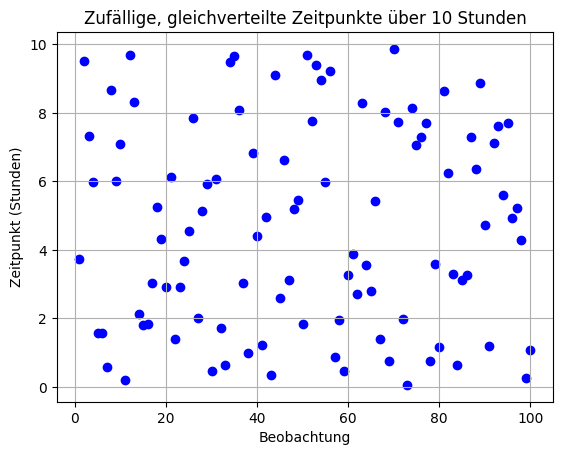

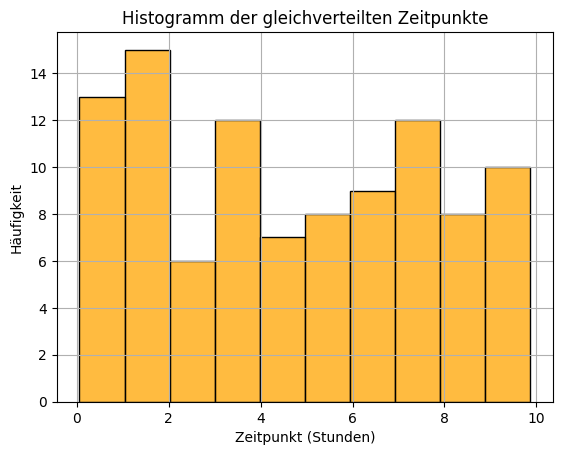

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Parameter für die Gleichverteilung
start_time = 0  # Startzeit (0 Stunden)
end_time = 10   # Endzeit (10 Stunden)
num_samples = 100  # Anzahl der zufälligen Zeitpunkte

# Generiere zufällige Zeitpunkte aus einer Gleichverteilung
np.random.seed(42)  # Für Reproduzierbarkeit
random_times = np.random.uniform(start_time, end_time, size=num_samples)

# Erstelle ein DataFrame
time_data = pd.DataFrame({'Zeitpunkt (Stunden)': random_times})

# Plot der zufälligen Zeitpunkte
plt.scatter(np.arange(1, num_samples+1), random_times, color='blue')
plt.title('Zufällige, gleichverteilte Zeitpunkte über 10 Stunden')
plt.xlabel('Beobachtung')
plt.ylabel('Zeitpunkt (Stunden)')
plt.grid()
plt.show()

# Histogramm der Verteilung der Zeitpunkte
sns.histplot(random_times, bins=10, kde=False, color='orange')
plt.title('Histogramm der gleichverteilten Zeitpunkte')
plt.xlabel('Zeitpunkt (Stunden)')
plt.ylabel('Häufigkeit')
plt.grid()
plt.show()


- der Scatterplot zeigt, dass die Zeitpunkte gleichmäßig über den Zeitraum verteilt sind
- die Punkte verteilen sich zufällig, aber gleichmäßig über die 10 Stunden
- das Histogramm zeigt eine gleichmäßige Verteilung
- d.h. jeder Zeitpunkt hat eine ähnliche Wahrscheinlichkeit, ausgewählt zu werden